##### Purpose of the notebook ####

In [13]:
import os
import numpy as np
import pandas as pd
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
from scipy.sparse import csr_matrix, issparse
from scvelo import logging as logg
from scvelo import settings
from scvelo.preprocessing.neighbors import get_connectivities, get_n_neighs, neighbors, verify_neighbors
from scvelo.preprocessing.utils import normalize_per_cell, not_yet_normalized
import infercnvpy as cnv
import matplotlib

import sys
sys.path.append("../..")
import insitucnv as icv

# Read adata

In [14]:
saving_path='/media/sergio/GBX/5KXenium/processed/5k_lymph_node'
adata=sc.read(os.path.join(saving_path,'adata_annotated.h5ad'))

# Normalize data

In [15]:
adata.X=adata.layers['raw']
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)

## Perform data smoothing, using expression-based neighbors

In [16]:
icv.tl.smooth_data_for_cnv(adata,n_neighbors=200)

In [17]:
adata.write(os.path.join(saving_path,'adata_annotated_moments_neighbors_200.h5ad'))

# CNV inference with inferCNV

In [2]:
saving_path='/media/sergio/GBX/5KXenium/processed/5k_lymph_node'
adata=sc.read(os.path.join(saving_path,'adata_annotated_moments_neighbors_200.h5ad'))

In [18]:
adata.X=adata.layers['M'].copy()

In [19]:
cnv.tl.infercnv(adata,reference_key="cell class",reference_cat=None,window_size=60,layer='M')

100%|█████████████████████████████████████████████████████████████████████████████████| 142/142 [01:43<00:00,  1.37it/s]


/home/sergio/.local/lib/python3.10/site-packages/scanpy/_settings.py:488: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


categories: B cell, DC, Endothelial, etc.
var_group_labels: chr1, chr2, chr3, etc.


INFO:fontTools.subset:maxp pruned
INFO:fontTools.subset:cmap pruned
INFO:fontTools.subset:kern dropped
INFO:fontTools.subset:post pruned
INFO:fontTools.subset:FFTM dropped
INFO:fontTools.subset:GPOS pruned
INFO:fontTools.subset:GSUB pruned
INFO:fontTools.subset:glyf pruned
INFO:fontTools.subset:Added gid0 to subset
INFO:fontTools.subset:Added first four glyphs to subset
INFO:fontTools.subset:Closing glyph list over 'MATH': 44 glyphs before
INFO:fontTools.subset:Glyph names: ['.notdef', '.null', 'B', 'C', 'D', 'E', 'L', 'M', 'P', 'S', 'T', 'a', 'c', 'd', 'e', 'eight', 'five', 'four', 'g', 'h', 'i', 'l', 'm', 'minus', 'n', 'nine', 'nonmarkingreturn', 'o', 'one', 'p', 'period', 'r', 's', 'seven', 'six', 'slash', 'space', 't', 'three', 'two', 'w', 'x', 'y', 'zero']
INFO:fontTools.subset:Glyph IDs:   [0, 1, 2, 3, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 37, 38, 39, 40, 47, 48, 51, 54, 55, 68, 70, 71, 72, 74, 75, 76, 79, 80, 81, 82, 83, 85, 86, 87, 90, 91, 92, 3228]
INFO:fontTools.sub

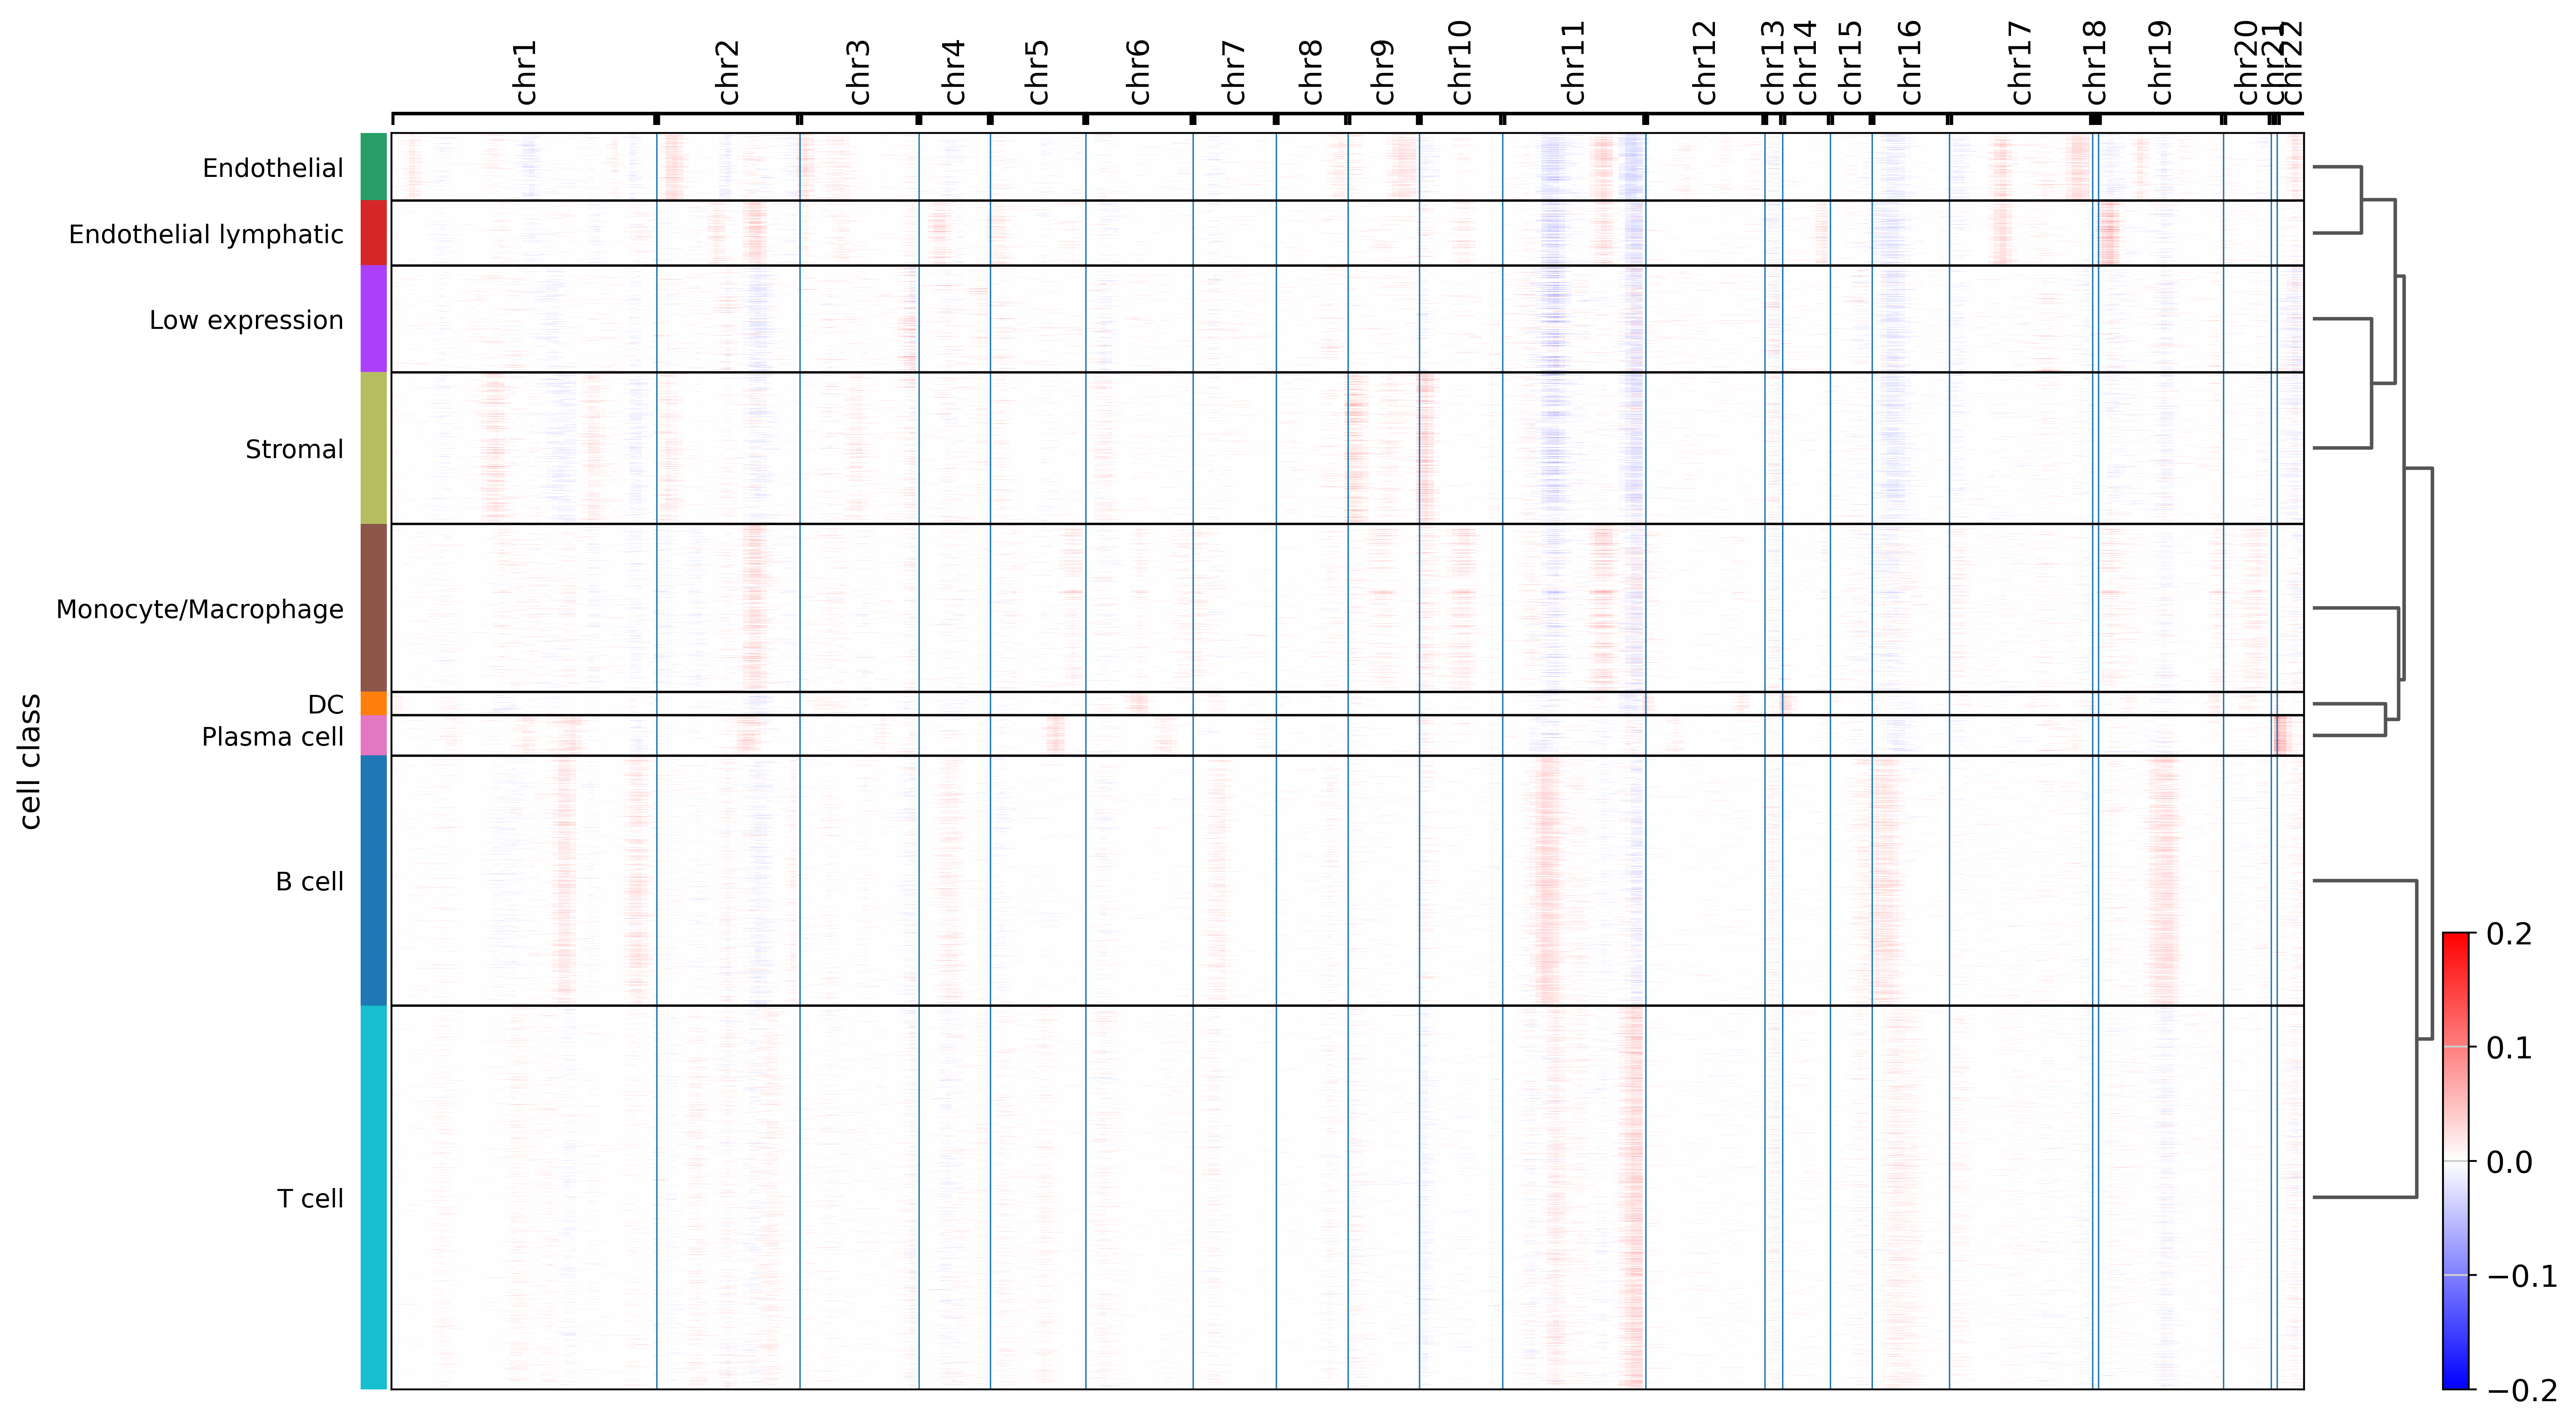

In [25]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
cnv.pl.chromosome_heatmap(adata, groupby="cell class",dendrogram=True,vmax=0.2,vmin=-0.2,show=False)
plt.savefig(saving_path+'/heatmap_cell_class_moments.pdf')

In [26]:
cnv.tl.pca(adata)
cnv.pp.neighbors(adata)

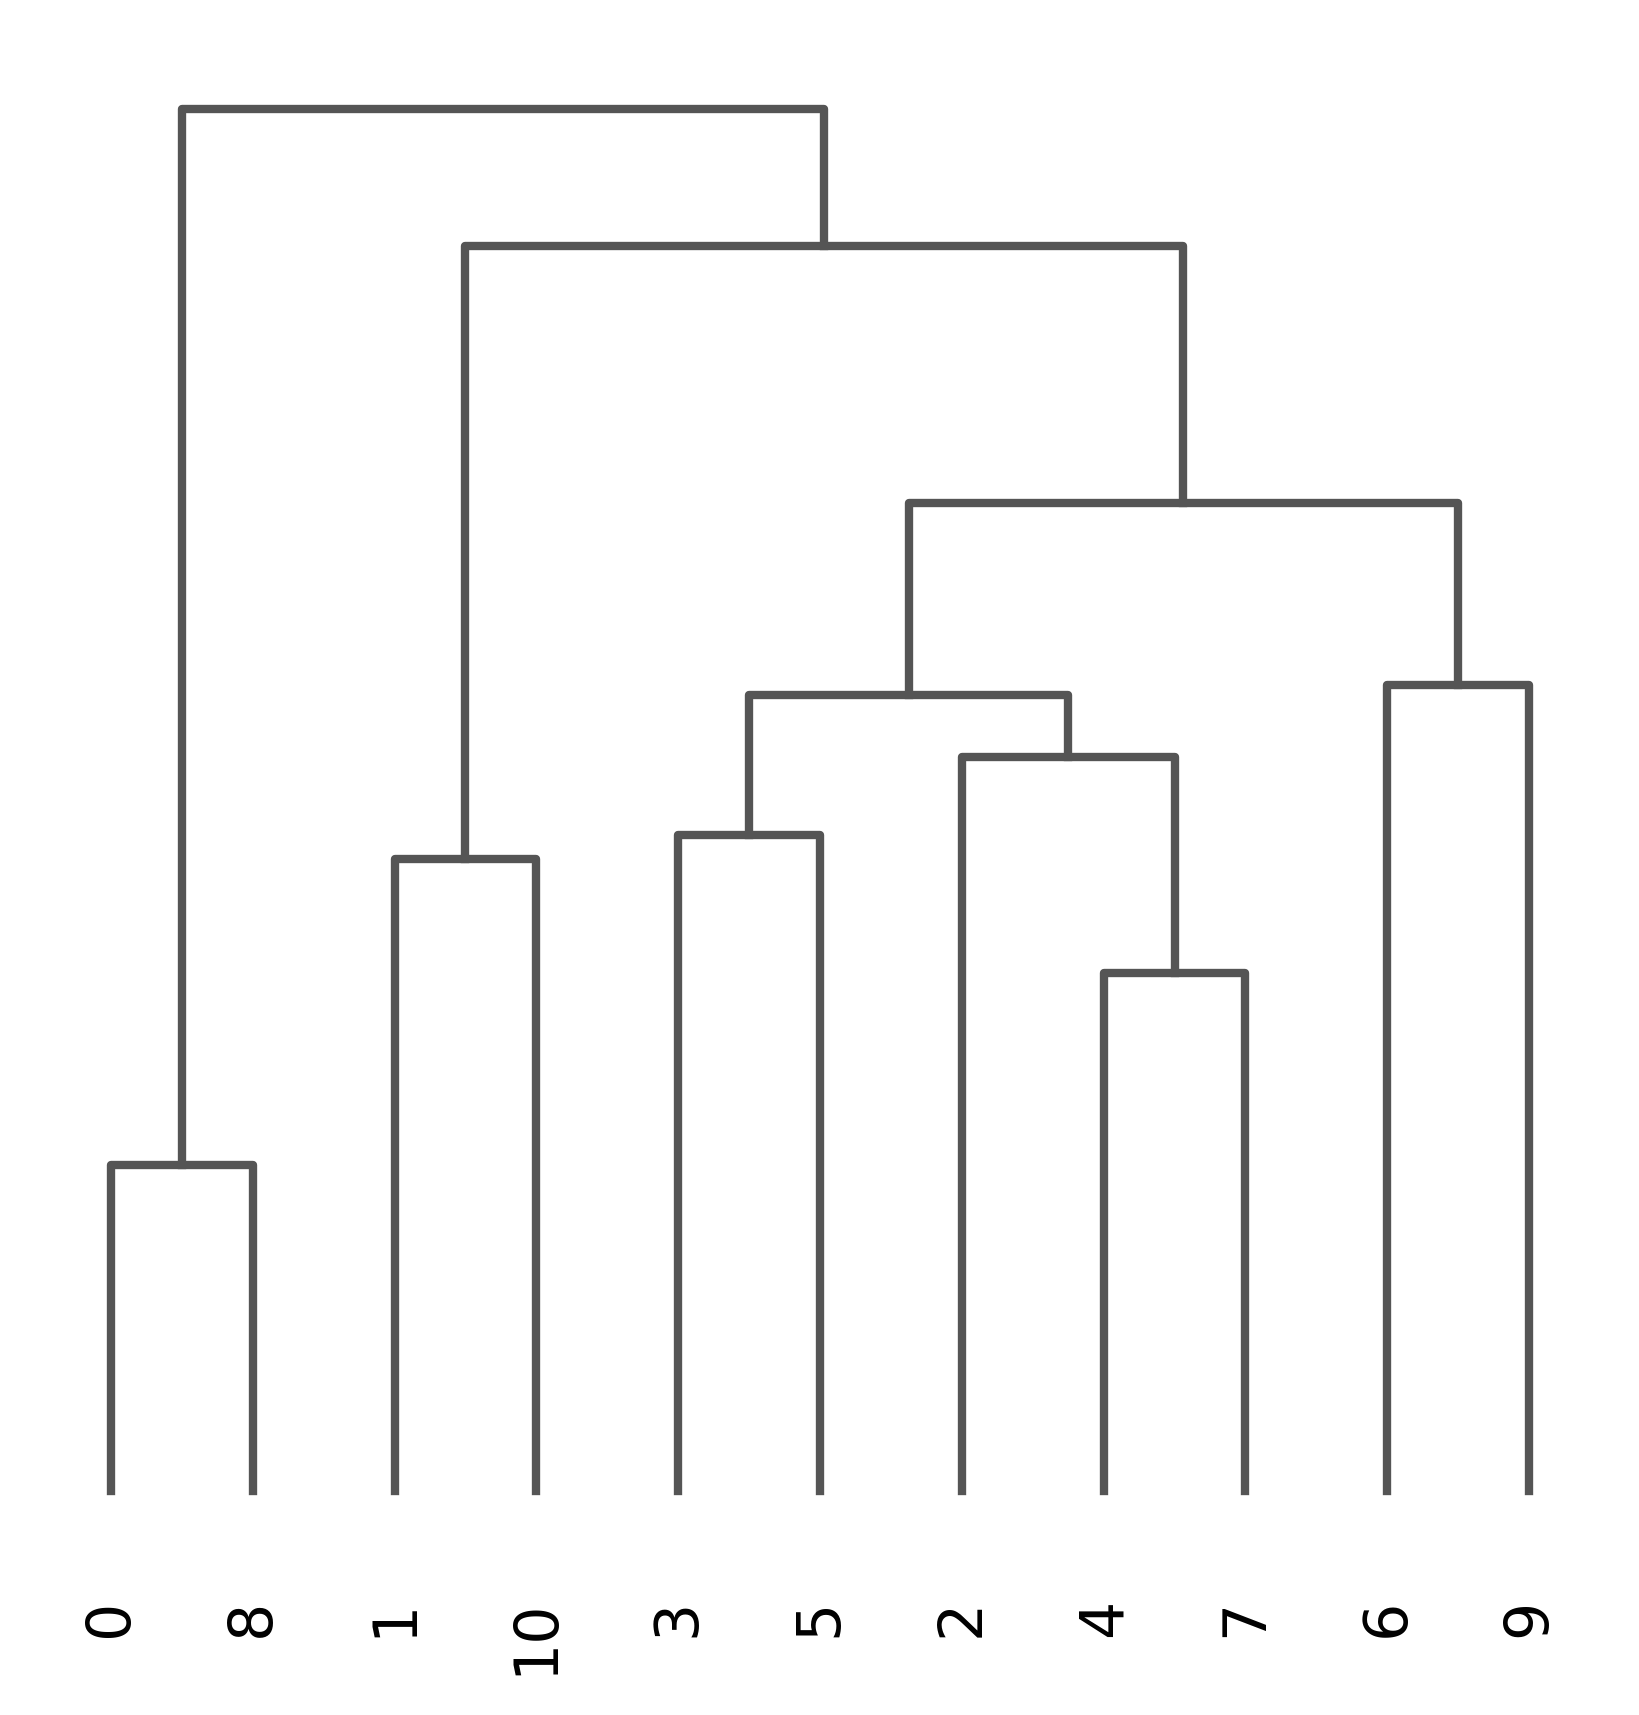

<Axes: >

In [27]:
cnv.tl.leiden(adata,resolution=0.4)
sc.tl.dendrogram(adata,groupby='cnv_leiden')
sc.pl.dendrogram(adata,groupby='cnv_leiden')

In [ ]:
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
cnv.pl.chromosome_heatmap(adata, groupby="cnv_leiden",dendrogram=True,vmax=0.4,show=False)
plt.savefig(saving_path+'/heatmap_cnv_leiden_moments.pdf')

In [ ]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
cnv.pl.chromosome_heatmap_summary(adata, groupby="cnv_leiden",dendrogram=True,vmax=0.4,show=False)
plt.savefig(saving_path+'/heatmap_summary_cnv_leiden_moments.pdf')

/home/sergio/.local/lib/python3.10/site-packages/scanpy/_settings.py:488: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  IPython.display.set_matplotlib_formats(*ipython_format)


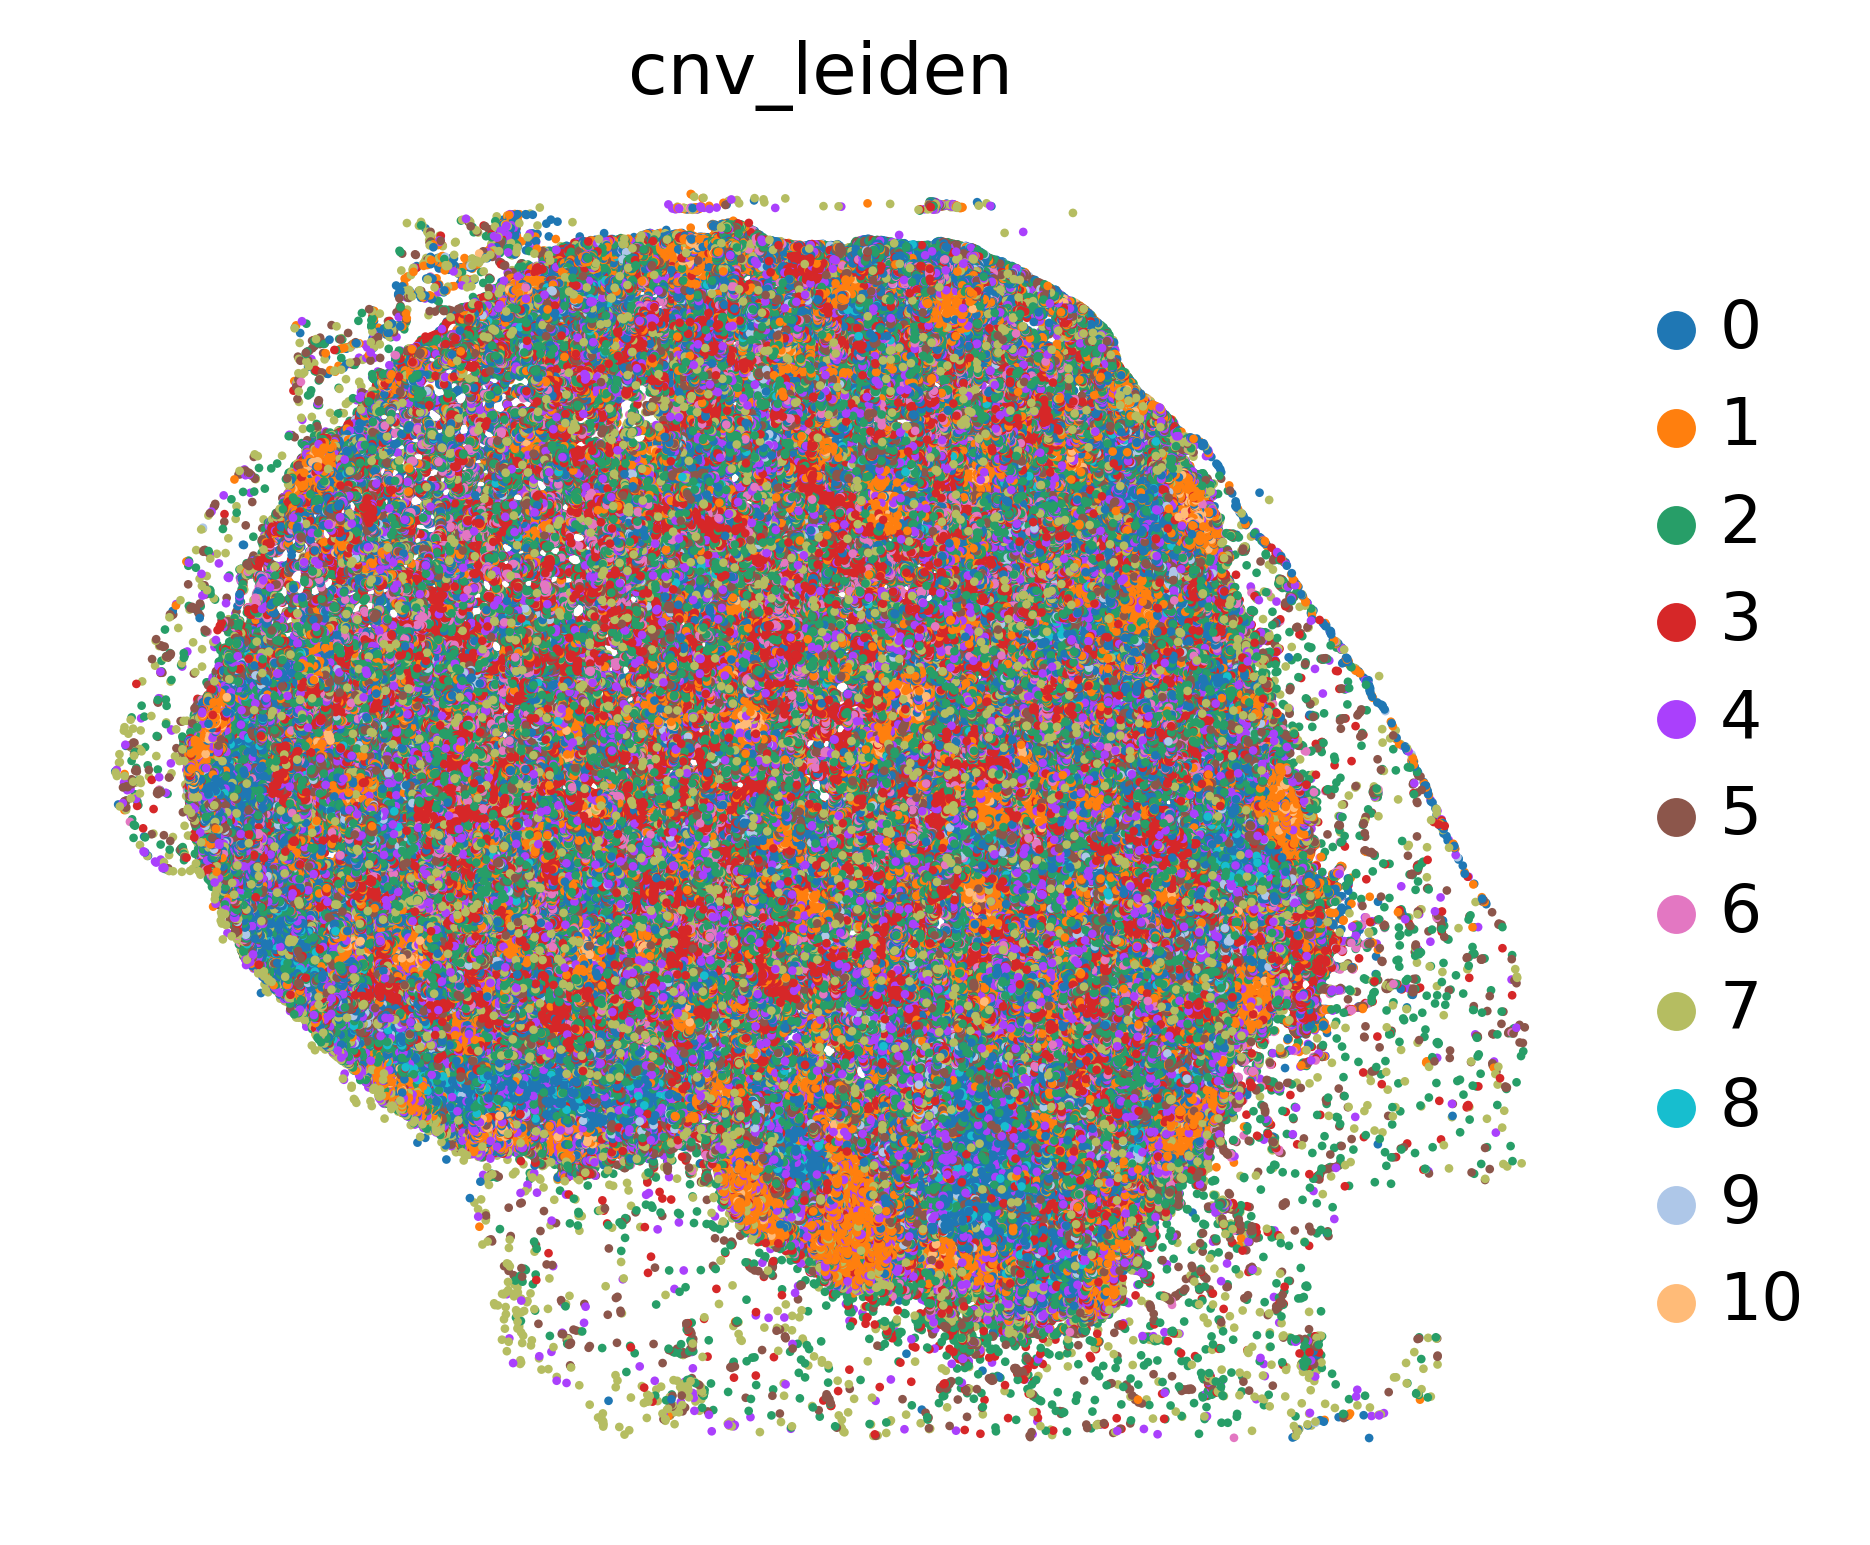

<Figure size 1000x1000 with 0 Axes>

In [30]:
import matplotlib
sc.set_figure_params(scanpy=True, dpi=200, dpi_save=200, frameon=False, vector_friendly=True, fontsize=13, figsize=(5,5), color_map=None, format='pdf', facecolor=None, transparent=False, ipython_format='png2x')
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
sc.pl.spatial(adata,color='cnv_leiden',spot_size=50,frameon=False)
plt.savefig(saving_path+'/spatial_cnv_leiden_moments.pdf')

In [31]:
adata.write(os.path.join(saving_path,'/media/sergio/Ymir/5kovarian_for_cnv/adata_moments_cnvinfered_neighbors_200.h5ad'))

# VERY RELEVANT 
TAP1, TAP2 and CFB are all present in the same locus. (6p21.3) -Interferon

While the same occurs for IFIT1 and IFIT3 (10q23.31) - MHC

GATA4 and SFRP1 are located in 8p and could also generate the CNV we observe in cnv cluster 8